In [6]:
# Import the required libraries and modules
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score
from xgboost import XGBRegressor as XGBR
from sklearn.cluster import KMeans

In [7]:
# Read the Excel file into a DataFrame
df = pd.read_excel("EC-AOP.xlsx")
# Define the features (independent variables)
features = ['EC-C', 'BC-C', 'PMS-C', 'pH', 'Bio', 'T','O/C','Id/Ig', 'SSA','HN','Gap','VIP']
# Extract the feature matrix X and the target variable y
X = df[features]
y = np.log10(df["K"])

In [9]:
# KMEANS clustering
EC_features = ['VIP','HN','Gap']
EC_df = df[EC_features]
km = KMeans(n_clusters=2, random_state=100)
km.fit(EC_df)
cluster_labels = km.predict(EC_df)
df['cluster'] = cluster_labels

C:\Users\19506\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\19506\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [11]:
E2D_index = df[df['cluster']==0].index
H2D_index = df[df['cluster']==1].index
E2D = df.loc[E2D_index]
H2D = df.loc[H2D_index]

In [22]:
E2D.describe()

,K,EC-C,BC-C,PMS-C,pH,Bio,T,Mod,N/C,O/C,...,Vtotal,VIP,HN,Gap,EI,NI,Ads,CP,SN,cluster
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,...,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,567.0
mean,0.108007,0.687869,0.534012,0.444303,0.482743,0.378410,0.488464,0.510876,0.422815,0.497622,...,0.484822,0.229342,0.138041,0.198745,0.693452,0.684760,0.216931,0.246040,0.784661,0.0
std,0.104765,0.134311,0.206224,0.184669,0.192083,0.324383,0.232762,0.237836,0.319041,0.178719,...,0.182198,0.086835,0.083184,0.082727,0.238502,0.146461,0.412519,0.247777,0.118331,0.0
min,0.002200,0.398585,0.023097,0.000000,0.000000,0.000000,0.074553,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.134741,0.525339,0.000000,0.009618,0.443828,0.0
25%,0.029150,0.551556,0.413567,0.353784,0.367248,0.000000,0.309453,0.333333,0.000000,0.376603,...,0.385726,0.162963,0.101607,0.205131,0.380871,0.557315,0.000000,0.062170,0.704577,0.0
50%,0.066300,0.684252,0.549385,0.445734,0.486434,0.316851,0.474168,0.500000,0.562287,0.473911,...,0.482664,0.245173,0.101607,0.205131,0.855328,0.638763,0.000000,0.062170,0.832178,0.0
75%,0.164700,0.792818,0.705110,0.569785,0.581395,0.615838,0.644513,0.666667,0.650225,0.600956,...,0.569804,0.302208,0.189998,0.232368,0.855328,0.819658,0.000000,0.531242,0.832178,0.0
max,0.521242,1.000000,0.946533,0.886591,1.000000,1.000000,1.000000,1.000000,1.000000,0.900650,...,1.000000,0.302208,0.411963,0.438574,1.000000,1.000000,1.000000,0.882575,1.000000,0.0


Train R2= 0.996
Train RMSE: 0.029
Test R2= 0.835
Test RMSE: 0.180


Text(0.5, 0.98, 'E2D')

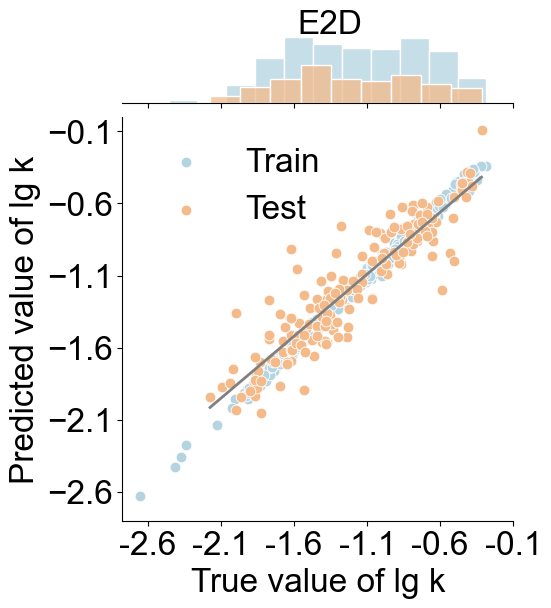

In [29]:
X = E2D[features]
y = np.log10(E2D["K"])
# Model training
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=20)
model = XGBR(learning_rate=0.1,
           n_estimators=640,
           max_depth=4,
           min_child_weight=2,
           seed=0,
           subsample=0.59,
           colsample_bytree=0.8,
           gamma=0,
           reg_alpha=0,
           reg_lambda=1,
           eta=0.1)
model.fit(train_x,train_y)
train_y_predicted = model.predict(train_x)
test_y_predicted = model.predict(test_x)
print("Train R2= %.3f"%model.score(train_x,train_y))
print("Train RMSE: %.3f"% sqrt(mean_squared_error(train_y, train_y_predicted)))
print("Test R2= %.3f"%model.score(test_x,test_y))
print("Test RMSE: %.3f"% sqrt(mean_squared_error(test_y, test_y_predicted)))
    
# plot
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
    
g = sns.JointGrid()
sns.scatterplot(x=train_y, y=train_y_predicted, s=60, color='#b4d4e1', ax=g.ax_joint)
sns.scatterplot(x=test_y, y=test_y_predicted, s=60, color='#f4ba8a', ax=g.ax_joint)
sns.histplot(x=train_y,ax=g.ax_marg_x, color ='#B4D4E1',edgecolor='white')
sns.histplot(x=test_y, ax=g.ax_marg_x, color ='#f4ba8a',edgecolor='white')
sns.regplot(x=test_y, y=test_y_predicted, scatter=False, ci=None, color='grey', ax=g.ax_joint,line_kws={'linewidth':2})
    
xticks = [-2.6, -2.1, -1.6, -1.1, -0.6, -0.1]
g.ax_joint.set_xticks(xticks)
g.ax_joint.set_xticklabels(xticks,fontsize=24)
plt.ylim(-2.8,0)
plt.yticks([-2.6, -2.1, -1.6, -1.1, -0.6, -0.1],fontsize=24)
g.ax_marg_y.remove()
g.set_axis_labels("True value of lg k", "Predicted value of lg k", fontsize =24, fontname = 'Arial')
g.ax_joint.legend(["Train", "Test"],frameon=False,prop={'size' :24, 'family' :'Arial'})
g.fig.suptitle("E2D",fontsize =24, fontname = 'Arial')


Train R2= 0.996
Train RMSE: 0.032
Test R2= 0.807
Test RMSE: 0.239


Text(0.5, 0.98, 'H2D')

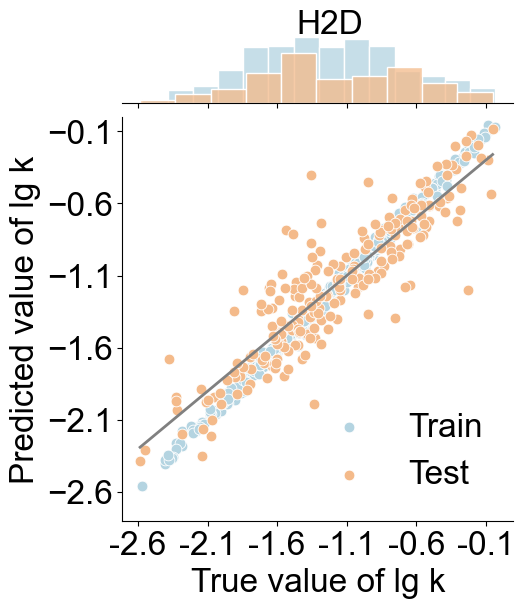

In [30]:
X = H2D[features]
y = np.log10(H2D["K"])
# Model training
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=70)
model = XGBR(learning_rate=0.05,
           n_estimators=520,
           max_depth=9,
           min_child_weight=4,
           seed=0,
           subsample=0.64,
           colsample_bytree=0.8,
           gamma=0,
           reg_alpha=0,
           reg_lambda=1,
           eta=0.1)
model.fit(train_x,train_y)
train_y_predicted = model.predict(train_x)
test_y_predicted = model.predict(test_x)
print("Train R2= %.3f"%model.score(train_x,train_y))
print("Train RMSE: %.3f"% sqrt(mean_squared_error(train_y, train_y_predicted)))
print("Test R2= %.3f"%model.score(test_x,test_y))
print("Test RMSE: %.3f"% sqrt(mean_squared_error(test_y, test_y_predicted)))
    
# plot
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
    
g = sns.JointGrid()
sns.scatterplot(x=train_y, y=train_y_predicted, s=60, color='#b4d4e1', ax=g.ax_joint)
sns.scatterplot(x=test_y, y=test_y_predicted, s=60, color='#f4ba8a', ax=g.ax_joint)
sns.histplot(x=train_y,ax=g.ax_marg_x, color ='#B4D4E1',edgecolor='white')
sns.histplot(x=test_y, ax=g.ax_marg_x, color ='#f4ba8a',edgecolor='white')
sns.regplot(x=test_y, y=test_y_predicted, scatter=False, ci=None, color='grey', ax=g.ax_joint,line_kws={'linewidth':2})
    
xticks = [-2.6, -2.1, -1.6, -1.1, -0.6, -0.1]
g.ax_joint.set_xticks(xticks)
g.ax_joint.set_xticklabels(xticks,fontsize=24)
plt.ylim(-2.8,0)
plt.yticks([-2.6, -2.1, -1.6, -1.1, -0.6, -0.1],fontsize=24)
g.ax_marg_y.remove()
g.set_axis_labels("True value of lg k", "Predicted value of lg k", fontsize =24, fontname = 'Arial')
g.ax_joint.legend(["Train", "Test"],frameon=False,prop={'size' :24, 'family' :'Arial'})
g.fig.suptitle("H2D",fontsize =24, fontname = 'Arial')